# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 OBSERVABLE TRENDS:

1) Temperature is the highest slightly below 0 latitude (close to the equator around -20 Lat.). There is a strong negative linear relationship between maximum temperature and latitude in the Northern Hemisphere however there is a weak positive linear relationship in the Southern Hemisphere.
2) There is a very weak positive linear relationship between humidity percentage and latitude in both hemispheres.
3) There are no/extremely weak linear relationships between cloudiness percentage/wind speed and latitude in both hemispheres.

In [2]:
#!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=b51d13ba3e75871d5a3028599b0fa3b39c614a2215ead305acf1a21e75ea673a
  Stored in directory: c:\users\alext\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


record = 1
city_record= 1

# Header print statement
print(f"Beginning Data Retrieval")
print(f"-"*30)

#Loop through the cities in the city list by making requests and storing response
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #city_record = response["name"]
        
        
        print(f"Processing Record {record} of Set {city_record}  | {response ['name']}")

        
        if record == 50 : 
            city_record= city_record + 1
            record = 0
        

        record= record + 1

    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1  | Rikitea
Processing Record 2 of Set 1  | Goderich
City not found. Skipping...
Processing Record 3 of Set 1  | Cabadiangan
Processing Record 4 of Set 1  | Nouadhibou
Processing Record 5 of Set 1  | Saldanha
Processing Record 6 of Set 1  | Fortuna
Processing Record 7 of Set 1  | Mount Gambier
Processing Record 8 of Set 1  | Jangaon
Processing Record 9 of Set 1  | Puerto Ayora
Processing Record 10 of Set 1  | Souillac
Processing Record 11 of Set 1  | Talnakh
Processing Record 12 of Set 1  | George Town
Processing Record 13 of Set 1  | Guanay
Processing Record 14 of Set 1  | Butaritari
Processing Record 15 of Set 1  | Burgos
Processing Record 16 of Set 1  | Bluff
Processing Record 17 of Set 1  | Albany
Processing Record 18 of Set 1  | Mount Isa
Processing Record 19 of Set 1  | Jilib
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1  | Chilca
Processing Record 21 of Set

Processing Record 34 of Set 4  | Te Anau
Processing Record 35 of Set 4  | El Copé
Processing Record 36 of Set 4  | Omboué
Processing Record 37 of Set 4  | Cayenne
Processing Record 38 of Set 4  | Chokurdakh
Processing Record 39 of Set 4  | Kerewan
Processing Record 40 of Set 4  | Venezuela
Processing Record 41 of Set 4  | Pangnirtung
Processing Record 42 of Set 4  | Saint-François
Processing Record 43 of Set 4  | Kaitangata
Processing Record 44 of Set 4  | Half Moon Bay
Processing Record 45 of Set 4  | Sioux Lookout
Processing Record 46 of Set 4  | Vazante
City not found. Skipping...
Processing Record 47 of Set 4  | Saquarema
Processing Record 48 of Set 4  | Grand-Santi
Processing Record 49 of Set 4  | Norman Wells
Processing Record 50 of Set 4  | Touros
Processing Record 1 of Set 5  | Nizhniy Kuranakh
Processing Record 2 of Set 5  | Shahrud
City not found. Skipping...
Processing Record 3 of Set 5  | Acaraú
City not found. Skipping...
Processing Record 4 of Set 5  | Kloulklubed
Process

Processing Record 16 of Set 8  | Tuatapere
Processing Record 17 of Set 8  | Babu
Processing Record 18 of Set 8  | Shache
Processing Record 19 of Set 8  | Fairlie
Processing Record 20 of Set 8  | Vila
Processing Record 21 of Set 8  | Gilgit
Processing Record 22 of Set 8  | Wangaratta
Processing Record 23 of Set 8  | Ushtobe
Processing Record 24 of Set 8  | Irituia
City not found. Skipping...
Processing Record 25 of Set 8  | Iqaluit
Processing Record 26 of Set 8  | Khovd
City not found. Skipping...
Processing Record 27 of Set 8  | Nanga Eboko
Processing Record 28 of Set 8  | Mersing
Processing Record 29 of Set 8  | Baloda Bāzār
Processing Record 30 of Set 8  | Luau
Processing Record 31 of Set 8  | Nelson Bay
Processing Record 32 of Set 8  | Keningau
Processing Record 33 of Set 8  | Korāput
Processing Record 34 of Set 8  | Morondava
Processing Record 35 of Set 8  | Tromsø
Processing Record 36 of Set 8  | Yar-Sale
Processing Record 37 of Set 8  | Atbasar
Processing Record 38 of Set 8  | Po

Processing Record 47 of Set 11  | Ixtapa
Processing Record 48 of Set 11  | Chernyshevskiy
City not found. Skipping...
Processing Record 49 of Set 11  | Bairiki Village
Processing Record 50 of Set 11  | Al Bardīyah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
weather_data= {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country":country,
    "Date": date,
}

weather_df= pd.DataFrame(weather_data)
weather_df

weather_df.to_csv('weather_data.csv')

In [121]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.026309,17.651800,54.653218,75.563636,53.574545,8.070655,1.606267e+09
std,33.126250,89.982584,25.285467,18.319830,41.132919,6.528083,1.052696e+02
min,-54.800000,-175.200000,-11.360000,12.000000,0.000000,0.360000,1.606267e+09
25%,-7.995000,-64.280000,35.650000,65.000000,3.000000,3.365000,1.606267e+09
50%,21.585000,23.055000,61.845000,79.000000,67.500000,6.070000,1.606268e+09
75%,46.427500,95.805000,75.200000,90.000000,96.000000,10.800000,1.606268e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.650000,1.606268e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"]>100].index

Int64Index([], dtype='int64')

In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df=weather_df.loc[weather_df["Humidity"]<=100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [75]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

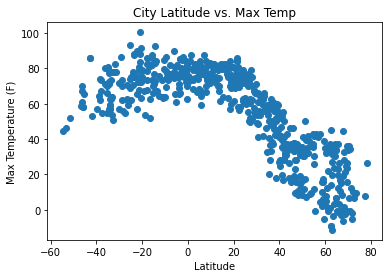

In [76]:
lat_scatter_plot("Max Temp", "Max Temperature (F)")

## Latitude vs. Humidity Plot

In [77]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

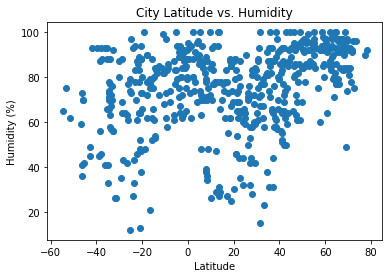

In [78]:
lat_scatter_plot("Humidity", "Humidity (%)")

## Latitude vs. Cloudiness Plot

In [79]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

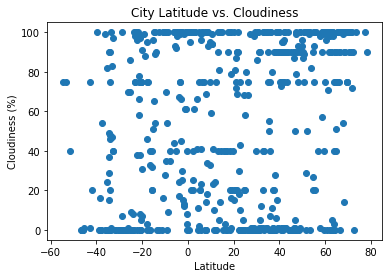

In [80]:
lat_scatter_plot("Cloudiness", "Cloudiness (%)")

## Latitude vs. Wind Speed Plot

In [81]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

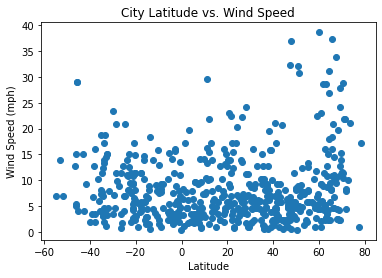

In [82]:
lat_scatter_plot("Wind Speed", "Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8786335022018134


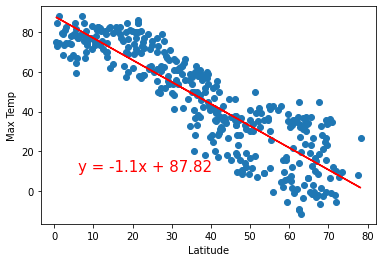

<Figure size 432x288 with 0 Axes>

In [111]:
# Calculate the correlation coefficient and linear regression model 

n_hem= weather_df.loc[weather_df["Lat"]> 0.0]

x_values = n_hem["Lat"]
temp_y_values = n_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, temp_y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,temp_y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Max_Temp_vs_nLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.45451072283190685


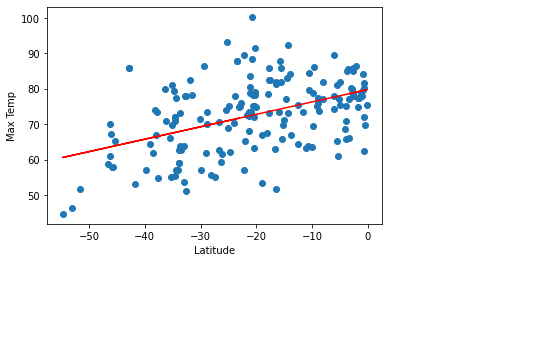

<Figure size 432x288 with 0 Axes>

In [112]:
s_hem= weather_df.loc[weather_df["Lat"]< 0.0]

x_values = s_hem["Lat"]
y_values = s_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Max_Temp_vs_sLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3804844883174032


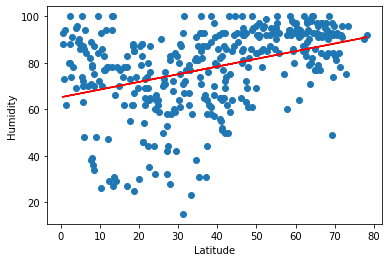

<Figure size 432x288 with 0 Axes>

In [113]:
n_hem= weather_df.loc[weather_df["Lat"]> 0.0]

x_values = n_hem["Lat"]
y_values = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Humidity_vs_nLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3279074356976461


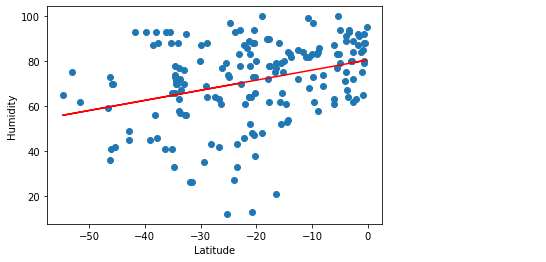

<Figure size 432x288 with 0 Axes>

In [114]:
s_hem= weather_df.loc[weather_df["Lat"]< 0.0]

x_values = s_hem["Lat"]
y_values = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Humidity_vs_sLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2668127889937744


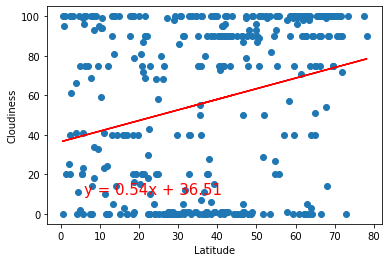

<Figure size 432x288 with 0 Axes>

In [115]:
n_hem= weather_df.loc[weather_df["Lat"]> 0.0]

x_values = n_hem["Lat"]
y_values = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Cloudiness_vs_nLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3095577513464293


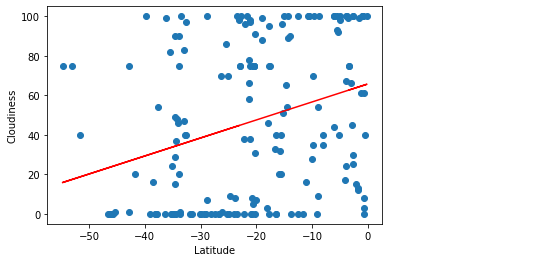

<Figure size 432x288 with 0 Axes>

In [116]:
s_hem= weather_df.loc[weather_df["Lat"]< 0.0]

x_values = s_hem["Lat"]
y_values = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Cloudiness_vs_sLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19941108722463485


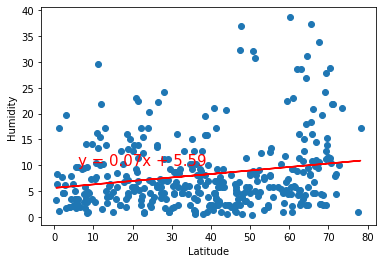

<Figure size 432x288 with 0 Axes>

In [117]:
n_hem= weather_df.loc[weather_df["Lat"]> 0.0]

x_values = n_hem["Lat"]
y_values = n_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Wind_Speed_vs_nLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25623756547394316


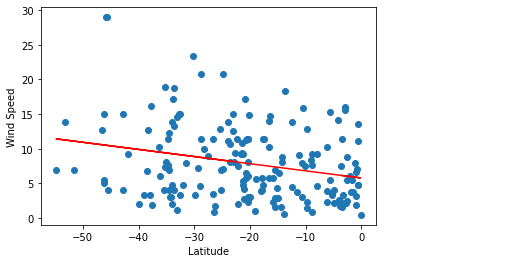

<Figure size 432x288 with 0 Axes>

In [118]:
s_hem= weather_df.loc[weather_df["Lat"]< 0.0]

x_values = s_hem["Lat"]
y_values = s_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Plots/Wind_Speed_vs_sLat.png")